In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Used_Bikes.csv")
df 

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [4]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(25324)

In [6]:
df = df.drop_duplicates()

In [7]:
df.to_csv("cleaned_used_bike.csv", index= False)

In [8]:
### Data divive into numerical and categorical columns

cat_col = df.select_dtypes(include= "O")  ## O is used for object i.e. characters
cat_col.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [9]:
num_col = df.select_dtypes(exclude= "O") ## this will only show numerical numbers
#### we can also use include= "float"

num_col.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [10]:
# feature selection -- imp
# we remove unwanted 

cat_col = cat_col.drop(["bike_name", "city"], axis = 1)
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [11]:
### encoding -- char ---- num
# 1.) lable encoding
## 2.) --- one hot encoding


### ONE HOT ENCODING
pd.get_dummies(cat_col).astype(int).head()

,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
###label encoding
dt = {
    "First Owner" : 1,
    "Second Owner" : 2,
    "Third Owner" : 3,
    "Fourth Owner Or More" : 4
}

In [13]:
cat_col["owner"] = cat_col["owner"].map(dt)
cat_col.head()

,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha


In [14]:
cat_col["brand"].value_counts()

brand
Bajaj              2081
Royal Enfield      1346
Hero               1142
Honda               676
Yamaha              651
TVS                 481
KTM                 375
Suzuki              203
Harley-Davidson      91
Kawasaki             61
Hyosung              53
Mahindra             50
Benelli              46
Triumph              21
Ducati               20
BMW                  10
Jawa                  7
Indian                3
MV                    3
Rajdoot               1
LML                   1
Yezdi                 1
Ideal                 1
Name: count, dtype: int64

In [15]:
dt1 = {i : key for key, i in enumerate(list(cat_col["brand"].unique()))}
dt1

{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [16]:
cat_col["brand"] = cat_col["brand"].map(dt1)
cat_col.head()

,owner,brand
0,1,0
1,1,1
2,1,2
3,1,0
4,1,3


In [17]:
### nw both are numerical so we concatinate both 

final_df = pd.concat([cat_col, num_col], axis= 1)
final_df

,owner,brand,price,kms_driven,age,power
0,1,0,35000.0,17654.0,3.0,110.0
1,1,1,119900.0,11000.0,4.0,350.0
2,1,2,600000.0,110.0,8.0,675.0
3,1,0,65000.0,16329.0,4.0,180.0
4,1,3,80000.0,10000.0,3.0,150.0
...,...,...,...,...,...,...
9362,1,5,25000.0,48587.0,8.0,150.0
9369,1,6,35000.0,60000.0,9.0,220.0
9370,1,14,450000.0,3430.0,4.0,750.0
9371,1,6,139000.0,21300.0,4.0,400.0


In [18]:
### to find relation between metrics

metrix = final_df.corr()
metrix

,owner,brand,price,kms_driven,age,power
owner,1.000000,0.005844,-0.005188,0.062612,0.203151,0.043746
brand,0.005844,1.000000,0.288409,-0.036161,-0.030263,0.068647
price,-0.005188,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,0.062612,-0.036161,-0.199951,1.000000,0.367518,-0.168295
age,0.203151,-0.030263,-0.248752,0.367518,1.000000,-0.164211
power,0.043746,0.068647,0.807641,-0.168295,-0.164211,1.000000


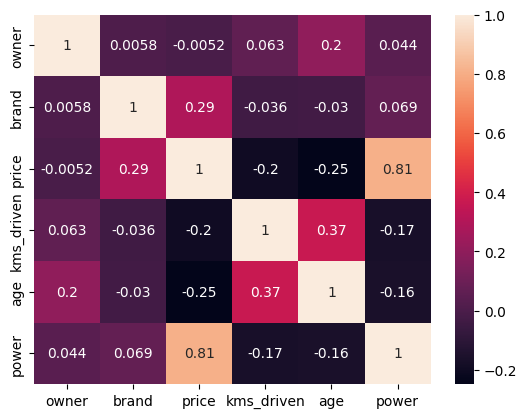

In [19]:
sns.heatmap(metrix,annot=True)
plt.show()

In [20]:
## dividing data into x and y i.e. features and target variable
y = final_df["price"]
x = final_df.drop("price", axis = 1)

In [21]:
x

,owner,brand,kms_driven,age,power
0,1,0,17654.0,3.0,110.0
1,1,1,11000.0,4.0,350.0
2,1,2,110.0,8.0,675.0
3,1,0,16329.0,4.0,180.0
4,1,3,10000.0,3.0,150.0
...,...,...,...,...,...
9362,1,5,48587.0,8.0,150.0
9369,1,6,60000.0,9.0,220.0
9370,1,14,3430.0,4.0,750.0
9371,1,6,21300.0,4.0,400.0


In [22]:
### scikit - learn / sklearn

# now we divide in training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42) # random_state is used to get same data every time we run the code 
# we have created 4 variables
### in test_size we can give any value between 0 to 1 i.e. 0.2 means 20% of data will be used for testing and rest for training
# we can also use stratify= y to get same data in both training and testing data


In [23]:
from sklearn.linear_model import LinearRegression # imported the LR model

LR = LinearRegression() ## made an object for the LR
LR.fit(x_train,y_train)

LinearRegression()

In [24]:
LR.score(x_test, y_test) ## this will give the accuracy of the model

0.7586900869386048

In [25]:
LR.score(x_train, y_train) ## this will give the accuracy of the model

0.7053826605671762

In [26]:
y_pred = LR.predict(x_test) ## this will give the predicted value of y
y_pred

array([125382.54523531, 216422.20333613,  96966.48595239, ...,
        72233.83615101, 208856.67620683,   9305.60087565], shape=(1465,))

In [27]:
df1 = pd.DataFrame({"Actual": y_test, "predicted" : y_pred}) # this will create a dataframe with actual and predicted values
df1

,Actual,predicted
4909,88400.0,125382.545235
1942,102850.0,216422.203336
5763,67000.0,96966.485952
4800,30000.0,7571.713344
7614,20000.0,8532.577046
...,...,...
5653,395000.0,476134.279312
609,140000.0,175120.608085
4211,54500.0,72233.836151
6379,114000.0,208856.676207


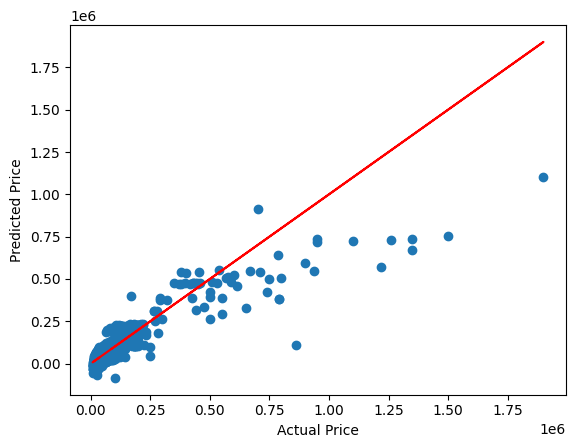

In [28]:
# plot the best fit line
plt.scatter(y_test, y_pred) # 
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot(y_test, y_test, color= "red") # this will plot the best fit line
plt.show()

In [29]:
# to save the model
import joblib,pickle
joblib.dump(LR, "bike_price_model.lb") # this will save the model in a file

['bike_price_model.lb']